In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools

The first step is to characterize all VMM cahnnels. This was done while all VMM hybrids connected to the UH DLC Micromegas and high voltage is off.
We start with the following scans:
1. Pulser DAC calibration
2. Threshold DAC calibration
3. Pedestal scan

The data from these scans is collected into an object below.

In [38]:
base_dir = "/Users/majdghrear/data/VMM3a_SRS/AUG23/calibs/"

AUG23_config = stripROtools.VMMconfig(  strip_map_loc= base_dir + "fixed_micromegas_200um.json",
                                        pedestal_loc = base_dir + "Pedestal_negative_9mVfC_200ns_60ns_40MHz_20230820-135650.csv",
                                        THL_DAC_loc = base_dir + "Threshold_DAC_negative_9mVfC_200ns_60ns_40MHz_20230820-135443.csv",
                                        PLSR_DAC_loc = base_dir + "Pulser_DAC_negative_9mVfC_200ns_60ns_40MHz_20230820-135331.csv")


In [39]:
# This dataframe contains info about the strip to channel mapping and the pedestal[mV]
AUG23_config.StripInfo.head()

,det,plane,fec,vmm,ch,pos,pedestal,mask
0,1,0,2,0,0,-1,170,True
1,1,0,2,0,1,62,192,True
2,1,0,2,0,2,-1,171,True
3,1,0,2,0,3,61,1144,False
4,1,0,2,0,4,63,175,True


In [40]:
# This datafrae contains info about the pulser DAC calibration
# A line is fit to all data poiints with DAC >= 200 to obtain a slope and offset
AUG23_config.PLSR_DAC.head()

,fec,vmm,PLSR_DAC,PLSR_mV,slope,offset
0,2,0,"[200, 300, 400, 500, 600, 700, 800, 900, 1000]","[201, 280, 359, 440, 521, 602, 685, 767, 850]",0.811833,35.677778
1,2,1,"[200, 300, 400, 500, 600, 700, 800, 900, 1000]","[170, 246, 323, 401, 479, 558, 637, 717, 797]",0.784333,10.288889
2,2,2,"[200, 300, 400, 500, 600, 700, 800, 900, 1000]","[178, 258, 338, 419, 500, 582, 664, 747, 830]",0.815000,12.777778
3,2,3,"[200, 300, 400, 500, 600, 700, 800, 900, 1000]","[174, 252, 331, 411, 491, 572, 653, 734, 816]",0.803167,10.766667
4,2,4,"[200, 300, 400, 500, 600, 700, 800, 900, 1000]","[179, 255, 331, 408, 486, 564, 642, 720, 798]",0.774833,22.100000


For each VMM chip, we compute the mean pedestal and set the target threshold as 100mV above the mean pedestal. By using the fits from AUG23_config.THL_DAC we determine the corresponding Threshold DAC setting. The traget thresholds and corresponding DAC setting are whoen below for each VMM.

In [41]:
AUG23_config.THL_DAC_settings(100)

,fec,vmm,pedestal,target_thres_mV,threshold_DAC
0,2,0,171.500000,271.500000,300.574130
1,2,1,162.510638,262.510638,327.209276
2,2,2,168.453125,268.453125,313.574732
3,2,3,162.859375,262.859375,317.912100
4,2,4,162.921875,262.921875,322.134477
5,2,5,162.564516,262.564516,316.368898
6,2,6,164.396226,264.396226,310.063573
7,2,7,163.980769,263.980769,332.913674
8,2,8,172.537037,272.537037,321.765163
9,2,9,166.428571,266.428571,303.525836


The above threshold DAC values are input inot vmmsc and the a threshold DAC calibration is performed. this calibration updates the local trimmer DAC settings to equalize the threshold. The final vmmsc config with the updated local trimmer DAC setting is saved (as AUG23). Afterwards, a threshold measurment scan is performed. The data from this scan is added to our object below.

In [42]:
AUG23_config = stripROtools.VMMconfig(  strip_map_loc= base_dir + "fixed_micromegas_200um.json",
                                        pedestal_loc = base_dir + "Pedestal_negative_9mVfC_200ns_60ns_40MHz_20230820-135650.csv",
                                        THL_DAC_loc = base_dir + "Threshold_DAC_negative_9mVfC_200ns_60ns_40MHz_20230820-135443.csv",
                                        PLSR_DAC_loc = base_dir + "Pulser_DAC_negative_9mVfC_200ns_60ns_40MHz_20230820-135331.csv",
                                        THL_loc = base_dir + "Threshold_negative_9mVfC_200ns_60ns_40MHz_20230820-160416.csv")

In [43]:
# This dataframe contains info about the strip to channel mapping, the pedestal [mV], and the threshold [mV]
AUG23_config.StripInfo.head()

,det,plane,fec,vmm,ch,pos,pedestal,mask,threshold
0,1,0,2,0,0,-1,170,True,254
1,1,0,2,0,1,62,192,True,254
2,1,0,2,0,2,-1,171,True,254
3,1,0,2,0,3,61,1144,False,254
4,1,0,2,0,4,63,175,True,253


In [44]:
# There is an outlier with a threshold of 0 above pedestal, we mask it in vmmsc.
AUG23_config.StripInfo["mask"][AUG23_config.StripInfo["threshold"].idxmin() ] = False



/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


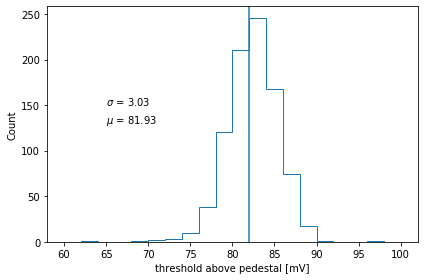

In [46]:
# we isolate for the vmm channels that are connected to a strip (pos != 1) and that are not damaged (damaged channesl with pedestal <140 or > 200 do not fire and hence can be ignored)
# we plot a histogram of the distance to pedestal for all channels

positions = AUG23_config.StripInfo.pos[ (AUG23_config.StripInfo.pos >= 0) & (AUG23_config.StripInfo["mask"] ) ]
thresholds = AUG23_config.StripInfo.threshold[ (AUG23_config.StripInfo.pos >= 0) & (AUG23_config.StripInfo["mask"] ) ]
pedestals = AUG23_config.StripInfo.pedestal[ (AUG23_config.StripInfo.pos >= 0) & (AUG23_config.StripInfo["mask"] ) ]

plt.hist(thresholds-pedestals,bins=20,range=(60,100),histtype="step")
plt.axvline(np.mean(thresholds-pedestals))
plt.text(65,150,"$\sigma$ = " +str(round(np.std(thresholds-pedestals),2)))
plt.text(65,130,"$\mu$ = " +str(round(np.mean(thresholds-pedestals),2)))
plt.xlabel("threshold above pedestal [mV]")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("./figures/THL_ped.pdf")

We note that although we the target was 100 mV above threshold, the final result is ~80mV above pedestal. 

/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


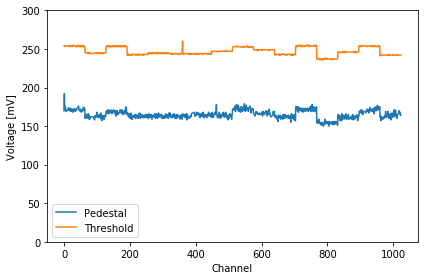

In [47]:
plt.plot(AUG23_config.StripInfo.index[AUG23_config.StripInfo["mask"] == True],AUG23_config.StripInfo.pedestal[AUG23_config.StripInfo["mask"] == True],label="Pedestal")
plt.plot(AUG23_config.StripInfo.index[AUG23_config.StripInfo["mask"] == True],AUG23_config.StripInfo.threshold[AUG23_config.StripInfo["mask"] == True],label="Threshold")

plt.ylim((0,300))
plt.xlabel("Channel")
plt.ylabel("Voltage [mV]")
plt.legend()
plt.tight_layout()
plt.savefig("./figures/THL_ped2.pdf")